In [ ]:
import numpy as np

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [ ]:
numerator = 0
denominator = 0
for i in range(len(x)):
    numerator += (x[i] - x_mean) * (y[i] - y_mean)
    denominator += (x[i] - x_mean) ** 2

b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)


In [ ]:
print("Regression Coefficients:")
print("b0 =", b0)
print("b1 =", b1)



Regression Coefficients:
b0 = 1.2363636363636363
b1 = 1.1696969696969697


In [ ]:
y_pred = b0 + b1 * x

In [ ]:
sse = np.sum((y - y_pred) ** 2)
print("Sum Squared Error (SSE):", sse)


Sum Squared Error (SSE): 5.624242424242423


In [ ]:
sst = np.sum((y - y_mean) ** 2)
r_squared = 1 - (sse / sst)
print("R-squared value:", r_squared)

R-squared value: 0.952538038613988


In [ ]:
learning_rate = 0.01

In [ ]:
num_iterations = 1000

In [ ]:
b0_gd = 0
b1_gd = 0


In [ ]:
for i in range(num_iterations):
    y_pred_gd = b0_gd + b1_gd * x
    error = y - y_pred_gd
    b0_gd = b0_gd - learning_rate * np.sum(error) * (-2 / len(x))
    b1_gd = b1_gd - learning_rate * np.sum(error * (-2 * x) / len(x))


In [ ]:
print("Full-batch Gradient Descent:")
print("b0 =", b0_gd)
print("b1 =", b1_gd)


Full-batch Gradient Descent:
b0 = 1.2328099487610318
b1 = 1.170263693076768


In [ ]:
b0_sgd = 0
b1_sgd = 0
for i in range(num_iterations):
    for j in range(len(x)):
        y_pred_sgd = b0_sgd + b1_sgd * x[j]
        error_sgd = y[j] - y_pred_sgd
        b0_sgd = b0_sgd - learning_rate * error_sgd * (-2)
        b1_sgd = b1_sgd - learning_rate * error_sgd * (-2 * x[j])

print("Stochastic Gradient Descent:")
print("b0 =", b0_sgd)
print("b1 =", b1_sgd)


Stochastic Gradient Descent:
b0 = 0.8967040680508923
b1 = 1.2986755729435908


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])


In [ ]:
target = raw_df.values[1::2, 2]

In [ ]:
df = pd.DataFrame(data=data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['PRICE'] = target

In [ ]:
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix['PRICE'])

Correlation Matrix:
 CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64


In [ ]:
best_attribute = correlation_matrix['PRICE'].idxmax(axis=0)
print(f"The attribute with the highest correlation with PRICE is: {best_attribute}")

The attribute with the highest correlation with PRICE is: PRICE


In [ ]:
X = df[[best_attribute]].values
y = df['PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_mean = np.mean(X_train_scaled)
y_train_mean = np.mean(y_train)

In [ ]:
numerator = np.sum((X_train_scaled - X_train_mean) * (y_train - y_train_mean))
denominator = np.sum((X_train_scaled - X_train_mean) ** 2)
beta_1_analytic = numerator / denominator
beta_0_analytic = y_train_mean - beta_1_analytic * X_train_mean


In [ ]:
y_pred_analytic = beta_0_analytic + beta_1_analytic * X_test_scaled

In [ ]:
SSE_analytic = np.sum((y_test - y_pred_analytic) ** 2)
SST = np.sum((y_test - np.mean(y_test)) ** 2)
R2_analytic = 1 - SSE_analytic / SST

In [ ]:
print("Analytic Solution:")
print(f"Beta 0 (Intercept): {beta_0_analytic}")
print(f"Beta 1 (Slope): {beta_1_analytic}")
print(f"SSE: {SSE_analytic}")
print(f"R^2: {R2_analytic}")

Analytic Solution:
Beta 0 (Intercept): 22.112541254125414
Beta 1 (Slope): 2.743679870756823e-15
SSE: 3766919.597054973
R^2: -204.4666217372155


In [ ]:
beta_0_gd = 0
beta_1_gd = 0
alpha = 0.01
epochs = 1000

In [ ]:
for epoch in range(epochs):
    y_pred_gd = beta_0_gd + beta_1_gd * X_train_scaled
    error = y_pred_gd - y_train
    beta_0_gd -= alpha * (1/len(y_train)) * np.sum(error)
    beta_1_gd -= alpha * (1/len(y_train)) * np.sum(error * X_train_scaled)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-15-54246ce985b7>:4: RuntimeWarning: invalid value encountered in scalar subtract
  beta_0_gd -= alpha * (1/len(y_train)) * np.sum(error)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
y_pred_gd_test = beta_0_gd + beta_1_gd * X_test_scaled

In [ ]:
SSE_gd = np.sum((y_test - y_pred_gd_test) ** 2)
R2_gd = 1 - SSE_gd / SST

In [ ]:
print("\nGradient Descent Solution:")
print(f"Beta 0 (Intercept): {beta_0_gd}")
print(f"Beta 1 (Slope): {beta_1_gd}")
print(f"SSE: {SSE_gd}")
print(f"R^2: {R2_gd}")


Gradient Descent Solution:
Beta 0 (Intercept): nan
Beta 1 (Slope): nan
SSE: nan
R^2: nan


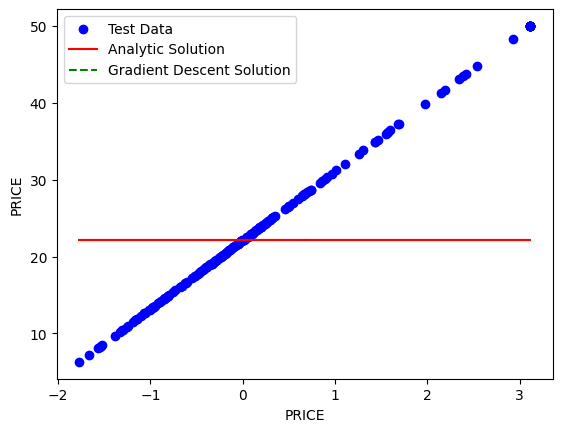

In [ ]:
plt.scatter(X_test_scaled, y_test, color='blue', label='Test Data')
plt.plot(X_test_scaled, y_pred_analytic, color='red', label='Analytic Solution')
plt.plot(X_test_scaled, y_pred_gd_test, color='green', linestyle='--', label='Gradient Descent Solution')
plt.xlabel(best_attribute)
plt.ylabel('PRICE')
plt.legend()
plt.show()